In [0]:
# https://keras.io/
!pip install -q keras
import keras

import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, SeparableConv2D
from keras.layers import Concatenate
from keras.optimizers import Adam
from keras.layers.advanced_activations import LeakyReLU, ReLU
from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda
from keras.layers.merge import concatenate
from keras.preprocessing.image import ImageDataGenerator

# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
from keras import backend as k

# Don't pre-allocate memory; allocate as-needed
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

# Hyperparameters
batch_size = 128
num_classes = 10
epochs = 50
l = 10
num_filter = 20

Using TensorFlow backend.


In [0]:
# Load CIFAR10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]

# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
def space_to_depth_x2(x):
    return tf.space_to_depth(x, block_size=2)

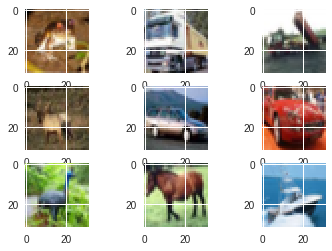

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


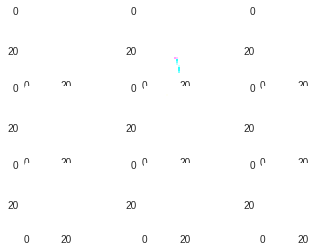

In [0]:
### Data Augmentation ###################


datagen = ImageDataGenerator(
                             #featurewise_center=True, 
                             #featurewise_std_normalization=True,
                             #zca_epsilon=1e-06,
                             #zca_whitening=True,
                             rotation_range=30,
                             width_shift_range=0.1, height_shift_range=0.1,
                             zoom_range=[0.8, 1.5],
                             #fill_mode='nearest',
                             horizontal_flip=True)
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
  for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_batch[i])
  plt.show()
  break

In [0]:
input = Input(shape=(img_height, img_width, channel,))

# Block_1
b1_layer = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input)
b1_layer = BatchNormalization(name='norm_1')(b1_layer)
b1_layer = ReLU()(b1_layer)
b1_layer = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_2', use_bias=False)(b1_layer)
b1_layer = BatchNormalization(name='norm_2')(b1_layer)
b1_layer = ReLU()(b1_layer)
b1_layer = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_3', use_bias=False)(b1_layer)
b1_layer = BatchNormalization(name='norm_3')(b1_layer)
b1_layer = ReLU()(b1_layer)
b1_layer = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_4', use_bias=False)(b1_layer)
b1_layer = BatchNormalization(name='norm_4')(b1_layer)
b1_layer = ReLU()(b1_layer)
b1_layer = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_5', use_bias=False)(b1_layer)
b1_layer = BatchNormalization(name='norm_5')(b1_layer)
b1_layer = ReLU()(b1_layer)
b1_layer = MaxPooling2D(pool_size=(2, 2))(b1_layer)
# -------------> output: 16, 16, 512

# skip connection
skip_connection = b1_layer
# -------------> output: 16, 16, 512


# Layer to do pointwise conv to reduce channels
b1_layer = Conv2D(32, (1,1), strides=(1,1), padding='same', name='conv_6', use_bias=False)(b1_layer)
b1_layer = BatchNormalization(name='norm_6')(b1_layer)
b1_layer = ReLU()(b1_layer)
# -------------> output: 16, 16, 32


# Block_2
b2_layer = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_7', use_bias=False)(b1_layer)
b2_layer = BatchNormalization(name='norm_7')(b2_layer)
b2_layer = ReLU()(b2_layer)
b2_layer = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_8', use_bias=False)(b2_layer)
b2_layer = BatchNormalization(name='norm_8')(b2_layer)
b2_layer = ReLU()(b2_layer)
b2_layer = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_9', use_bias=False)(b2_layer)
b2_layer = BatchNormalization(name='norm_9')(b2_layer)
b2_layer = ReLU()(b2_layer)
b2_layer = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_10', use_bias=False)(b2_layer)
b2_layer = BatchNormalization(name='norm_10')(b2_layer)
b2_layer = ReLU()(b2_layer)
b2_layer = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_11', use_bias=False)(b2_layer)
b2_layer = BatchNormalization(name='norm_11')(b2_layer)
b2_layer = ReLU()(b2_layer)
b2_layer = MaxPooling2D(pool_size=(2, 2))(b2_layer)
# -------------> 8, 8, 512



# Layer to do pointwise conv to reduce channels
b2_layer = Conv2D(32, (1,1), strides=(1,1), padding='same', name='conv_12', use_bias=False)(b2_layer)
b2_layer = BatchNormalization(name='norm_12')(b2_layer)
b2_layer = ReLU()(b2_layer)
# -------------> output: 8, 8, 32


# Block_3
b3_layer = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_13', use_bias=False)(b2_layer)
b3_layer = BatchNormalization(name='norm_13')(b3_layer)
b3_layer = ReLU()(b3_layer)
b3_layer = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_14', use_bias=False)(b3_layer)
b3_layer = BatchNormalization(name='norm_14')(b3_layer)
b3_layer = ReLU()(b3_layer)
b3_layer = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_15', use_bias=False)(b3_layer)
b3_layer = BatchNormalization(name='norm_15')(b3_layer)
b3_layer = ReLU()(b3_layer)
b3_layer = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_16', use_bias=False)(b3_layer)
b3_layer = BatchNormalization(name='norm_16')(b3_layer)
b3_layer = ReLU()(b3_layer)
b3_layer = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_17', use_bias=False)(b3_layer)
b3_layer = BatchNormalization(name='norm_17')(b3_layer)
b3_layer = ReLU()(b3_layer)
b3_layer = MaxPooling2D(pool_size=(2, 2))(b3_layer)
# -------------> 4, 4, 512



# Layer to do pointwise conv to reduce channels
b3_layer = Conv2D(32, (1,1), strides=(1,1), padding='same', name='conv_18', use_bias=False)(b3_layer)
b3_layer = BatchNormalization(name='norm_18')(b3_layer)
b3_layer = ReLU()(b3_layer)
# -------------> output: 4, 4, 32



# Block_4
b4_layer = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_19', use_bias=False)(b3_layer)
b4_layer = BatchNormalization(name='norm_19')(b4_layer)
b4_layer = ReLU()(b4_layer)
b4_layer = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_20', use_bias=False)(b4_layer)
b4_layer = BatchNormalization(name='norm_20')(b4_layer)
b4_layer = ReLU()(b4_layer)
b4_layer = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_21', use_bias=False)(b4_layer)
b4_layer = BatchNormalization(name='norm_21')(b4_layer)
b4_layer = ReLU()(b4_layer)
b4_layer = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_22', use_bias=False)(b4_layer)
b4_layer = BatchNormalization(name='norm_22')(b4_layer)
b4_layer = ReLU()(b4_layer)
b4_layer = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_23', use_bias=False)(b4_layer)
b4_layer = BatchNormalization(name='norm_23')(b4_layer)
b4_layer = ReLU()(b4_layer)
b4_layer = MaxPooling2D(pool_size=(2, 2))(b4_layer)
# -------------> 2, 2, 512



# Layer to reduce the spatial dimension for skip_connection 
skip_connection = Conv2D(32, (1,1), strides=(1,1), padding='same', name='conv_24', use_bias=False)(skip_connection)
skip_connection = BatchNormalization(name='norm_24')(skip_connection)
skip_connection = ReLU()(skip_connection)
skip_connection = MaxPooling2D(pool_size=(2, 2))(skip_connection)
skip_connection = Lambda(space_to_depth_x2)(skip_connection)
skip_connection = Lambda(space_to_depth_x2)(skip_connection)
# -------------> 2, 2, 512



# Layer to concatate Block1 and Block4 outputs
b5_layer = concatenate([skip_connection, b4_layer])
# -------------> 2, 2, 1024



# Layer to reduce the number of channels to number of categories
b6_layer = Conv2D(num_classes, (1,1), strides=(1,1), padding='same', name='conv_25', use_bias=False)(b5_layer)
b6_layer = BatchNormalization(name='norm_25')(b6_layer)
b6_layer = ReLU()(b6_layer)


# Layer to reduce the spatial dimensions
b7_layer = AveragePooling2D(data_format='channels_last')(b6_layer)

# Flatten layer
b8_layer = Flatten()(b7_layer)

# Output layer
output = Activation('softmax')(b8_layer)


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model = Model(inputs=[input], outputs=[output])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 32, 32, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
norm_1 (BatchNormalization)     (None, 32, 32, 32)   128         conv_1[0][0]                     
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 32, 32, 32)   0           norm_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Co

In [0]:
# determine Loss function and Optimizer

adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)   # With reduced learning rate
model.compile(loss='categorical_crossentropy',
              #optimizer=Adam(),
              optimizer=adam,
              metrics=['accuracy'])

In [0]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), steps_per_epoch = len(x_train) // batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4, verbose=1)

Epoch 1/50
390/390 [==============================] - 211s 541ms/step - loss: 1.5055 - acc: 0.4999 - val_loss: 1.6563 - val_acc: 0.4560
Epoch 2/50
390/390 [==============================] - 213s 547ms/step - loss: 1.2974 - acc: 0.5760 - val_loss: 1.4425 - val_acc: 0.5202
Epoch 3/50
390/390 [==============================] - 210s 538ms/step - loss: 1.1405 - acc: 0.6302 - val_loss: 1.6441 - val_acc: 0.4881
Epoch 4/50
390/390 [==============================] - 210s 539ms/step - loss: 1.0321 - acc: 0.6639 - val_loss: 1.0732 - val_acc: 0.6479
Epoch 5/50
390/390 [==============================] - 210s 539ms/step - loss: 0.9447 - acc: 0.6950 - val_loss: 1.1141 - val_acc: 0.6522
Epoch 6/50
390/390 [==============================] - 210s 540ms/step - loss: 0.8686 - acc: 0.7188 - val_loss: 1.0675 - val_acc: 0.6691
Epoch 7/50
390/390 [==============================] - 210s 539ms/step - loss: 0.8081 - acc: 0.7391 - val_loss: 1.2052 - val_acc: 0.6254
Epoch 8/50
390/390 [============================

In [0]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# Save the trained weights in to .h5 format
model.save_weights("Yolo_Basic_model8.h5")
print("Saved the model to disk")

10000/10000 [==============================] - 15s 1ms/step
Test loss: 0.3566131363630295
Test accuracy: 0.8854
Saved the model to disk


In [0]:
model.save_weights("Yolo_Basic_model9.h5")
print("Saved the model to disk")
from google.colab import files

files.download('Yolo_Basic_model9.h5')

Saved the model to disk
